In [1]:
#importing pandas and numpy and creating a reference variable bgroup to access dataset 
import pandas as pd
import numpy as np

bgroup = pd.read_csv("C:\\Users\\avula\\Desktop\\normal\\mydatasettt.csv")
print(bgroup)#display the dataset

      Patient_id Donor Recipient  Risk_Percent
0            NaN    A+        B+           NaN
1            NaN    A+        B+           NaN
2            NaN    O+        B+           NaN
3            NaN    A+        A+           NaN
4            NaN    A+        B+           NaN
...          ...   ...       ...           ...
5664         NaN    B+        O+           NaN
5665         NaN    B+        B+           NaN
5666         NaN    B+        O+           NaN
5667         NaN    A+        A+           NaN
5668         NaN    A+        O+           NaN

[5669 rows x 4 columns]


In [2]:
del bgroup["Patient_id"]

In [3]:
bgroup.shape

(5669, 3)

In [4]:
bgroup.describe(include='all')

,Donor,Recipient,Risk_Percent
count,5669,5669,0.0
unique,8,8,NaN
top,B+,O+,NaN
freq,1653,1976,NaN
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN


In [5]:
#Converting blood groups of Donors(Strings) into nums using lambda function 
d = {'A+':1,'A-':2,'B+':3, 'B-':4, 'AB+':5, 'AB-':6, 'O+':7, 'O-':8}
bgroup.Donor = [d[k] for k in bgroup.Donor]

In [6]:
bgroup

,Donor,Recipient,Risk_Percent
0,1,B+,NaN
1,1,B+,NaN
2,7,B+,NaN
3,1,A+,NaN
4,1,B+,NaN
...,...,...,...
5664,3,O+,NaN
5665,3,B+,NaN
5666,3,O+,NaN
5667,1,A+,NaN


In [7]:
#Converting blood groups of Recipient(Strings) into nums using lambda function 
e = {'A+':1,'A-':2,'B+':3, 'B-':4, 'AB+':5, 'AB-':6, 'O+':7, 'O-':8}
bgroup.Recipient = [e[k] for k in bgroup.Recipient]

In [8]:
bgroup

,Donor,Recipient,Risk_Percent
0,1,3,NaN
1,1,3,NaN
2,7,3,NaN
3,1,1,NaN
4,1,3,NaN
...,...,...,...
5664,3,7,NaN
5665,3,3,NaN
5666,3,7,NaN
5667,1,1,NaN


In [9]:
# bgroup.drop_duplicates(subset=None, inplace=True)
# bgroup

In [10]:
#Displaying indexes 
bgroup.reset_index(level=0, inplace=True)
bgroup

,index,Donor,Recipient,Risk_Percent
0,0,1,3,NaN
1,1,1,3,NaN
2,2,7,3,NaN
3,3,1,1,NaN
4,4,1,3,NaN
...,...,...,...,...
5664,5664,3,7,NaN
5665,5665,3,3,NaN
5666,5666,3,7,NaN
5667,5667,1,1,NaN


In [11]:
type(bgroup)
bgroup

,index,Donor,Recipient,Risk_Percent
0,0,1,3,NaN
1,1,1,3,NaN
2,2,7,3,NaN
3,3,1,1,NaN
4,4,1,3,NaN
...,...,...,...,...
5664,5664,3,7,NaN
5665,5665,3,3,NaN
5666,5666,3,7,NaN
5667,5667,1,1,NaN


In [12]:
#Adding a new column Risk to show the possibility of risk


from csv import writer
from csv import reader
def add_column_in_csv(input_file, output_file, transform_row):
    """ Append a column in existing csv using csv.reader / csv.writer classes"""
    # Open the input_file in read mode and output_file in write mode
    with open('bgroup', 'r') as read_obj, \
            open(output_file, 'w', newline='') as write_obj:
        # Create a csv.reader object from the input file object
        csv_reader = reader(read_obj)
        # Create a csv.writer object from the output file object
        csv_writer = writer(write_obj)
        # Read each row of the input csv file as list
        for row in csv_reader:
            # Pass the list / row in the transform function to add column text for this row
            transform_row(row, csv_reader.line_num)
            # Write the updated row / list to the output file
            csv_writer.writerow(row)

In [13]:
 #0 -- for 100% risk and 1 -- for Variable risk 

l=[]
bgroup['Risk']=''
data=bgroup.Donor
rows = len(data.axes[0])
l1=[1,2,7,8]
for i in bgroup.index:
    if bgroup['Recipient'][i]==1:
        if bgroup['Donor'][i] in l1:
            bgroup['Risk'][i]=1
        else:
             bgroup['Risk'][i]=0
l2=[2,8]
for i in bgroup.index:
    if bgroup['Recipient'][i]==2:
        if bgroup['Donor'][i] in l2:
            bgroup['Risk'][i]=1
        else:
             bgroup['Risk'][i]=0
l3=[3,4,7,8]
for i in bgroup.index:
    if bgroup['Recipient'][i]==3:
        if bgroup['Donor'][i] in l3:
            bgroup['Risk'][i]=1
        else:
             bgroup['Risk'][i]=0
l4=[4,8]
for i in bgroup.index:
    if bgroup['Recipient'][i]==4:
        if bgroup['Donor'][i] in l4:
            bgroup['Risk'][i]=1
        else:
             bgroup['Risk'][i]=0
l5=[1,2,3,4,5,6,7,8]
for i in bgroup.index:
    if bgroup['Recipient'][i]==5:
        if bgroup['Donor'][i] in l5:
            bgroup['Risk'][i]=1
        else:
             bgroup['Risk'][i]=0
l6=[2,4,5,8]
for i in bgroup.index:
    if bgroup['Recipient'][i]==6:
        if bgroup['Donor'][i] in l6:
            bgroup['Risk'][i]=1
        else:
             bgroup['Risk'][i]=0
l7=[7,8]
for i in bgroup.index:
    if bgroup['Recipient'][i]==7:
        if bgroup['Donor'][i] in l7:
            bgroup['Risk'][i]=1
        else:
             bgroup['Risk'][i]=0
l8=[8]
for i in bgroup.index:
    if bgroup['Recipient'][i]==8:
        if bgroup['Donor'][i] in l8:
            bgroup['Risk'][i]=1
        else:
             bgroup['Risk'][i]=0
bgroup           
# add_column_in_csv('bgroup', 'output_3.csv', lambda row, line_num: row.append(l[line_num - 1]))
# output_data=pd.read_csv('output_3.csv')
# output_data

C:\Users\avula\AppData\Local\Temp\ipykernel_17580\3567744379.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bgroup['Risk'][i]=1
C:\Users\avula\AppData\Local\Temp\ipykernel_17580\3567744379.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bgroup['Risk'][i]=0
C:\Users\avula\AppData\Local\Temp\ipykernel_17580\3567744379.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bgroup['Risk'][i]=0
C:\Users\avula\AppData\Local\Temp\ipy

,index,Donor,Recipient,Risk_Percent,Risk
0,0,1,3,NaN,0
1,1,1,3,NaN,0
2,2,7,3,NaN,1
3,3,1,1,NaN,1
4,4,1,3,NaN,0
...,...,...,...,...,...
5664,5664,3,7,NaN,0
5665,5665,3,3,NaN,1
5666,5666,3,7,NaN,0
5667,5667,1,1,NaN,1


In [14]:
#renaming index to Pid i.e.,Patient ID
bgroup.rename(columns = {'index':'Pid'}, inplace = True)
bgroup

,Pid,Donor,Recipient,Risk_Percent,Risk
0,0,1,3,NaN,0
1,1,1,3,NaN,0
2,2,7,3,NaN,1
3,3,1,1,NaN,1
4,4,1,3,NaN,0
...,...,...,...,...,...
5664,5664,3,7,NaN,0
5665,5665,3,3,NaN,1
5666,5666,3,7,NaN,0
5667,5667,1,1,NaN,1


In [15]:
#displaying first 20 records of dataset
bgroup.head(20)

,Pid,Donor,Recipient,Risk_Percent,Risk
0,0,1,3,NaN,0
1,1,1,3,NaN,0
2,2,7,3,NaN,1
3,3,1,1,NaN,1
4,4,1,3,NaN,0
5,5,3,3,NaN,1
6,6,3,3,NaN,1
7,7,7,2,NaN,0
8,8,3,1,NaN,0
9,9,5,1,NaN,0


In [16]:
#changing the IDs to natural nums
bgroup.Pid=1+bgroup.Pid
bgroup

,Pid,Donor,Recipient,Risk_Percent,Risk
0,1,1,3,NaN,0
1,2,1,3,NaN,0
2,3,7,3,NaN,1
3,4,1,1,NaN,1
4,5,1,3,NaN,0
...,...,...,...,...,...
5664,5665,3,7,NaN,0
5665,5666,3,3,NaN,1
5666,5667,3,7,NaN,0
5667,5668,1,1,NaN,1


In [17]:
#segregating the records
bgroup.drop(bgroup[bgroup['Risk']==0].index, inplace=True)
bgroup

,Pid,Donor,Recipient,Risk_Percent,Risk
2,3,7,3,NaN,1
3,4,1,1,NaN,1
5,6,3,3,NaN,1
6,7,3,3,NaN,1
10,11,7,3,NaN,1
...,...,...,...,...,...
5640,5641,1,1,NaN,1
5661,5662,1,1,NaN,1
5662,5663,1,1,NaN,1
5665,5666,3,3,NaN,1


In [18]:
#creating a subgroup named subgrp to access first 20 records
subgrp=bgroup.head(20)
subgrp

,Pid,Donor,Recipient,Risk_Percent,Risk
2,3,7,3,NaN,1
3,4,1,1,NaN,1
5,6,3,3,NaN,1
6,7,3,3,NaN,1
10,11,7,3,NaN,1
12,13,3,3,NaN,1
13,14,7,3,NaN,1
14,15,3,3,NaN,1
16,17,7,3,NaN,1
17,18,7,3,NaN,1


In [19]:
#we assign the ramdom risks to different patients using random function 
import random
subgrp['Risk_Percent'] = random.sample(range(10,90), len(subgrp))
subgrp

C:\Users\avula\AppData\Local\Temp\ipykernel_17580\661172447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subgrp['Risk_Percent'] = random.sample(range(10,90), len(subgrp))


,Pid,Donor,Recipient,Risk_Percent,Risk
2,3,7,3,79,1
3,4,1,1,26,1
5,6,3,3,28,1
6,7,3,3,62,1
10,11,7,3,82,1
12,13,3,3,58,1
13,14,7,3,84,1
14,15,3,3,40,1
16,17,7,3,38,1
17,18,7,3,14,1


In [20]:
# bgroup.drop_duplicates(subset=None, inplace=True)
# bgroup

In [21]:
a = np.array(subgrp['Donor'])
b = np.array(subgrp['Recipient'])
print(a)
print(b)
train_x = np.stack((a, b), axis=1)
print(train_x)

[7 1 3 3 7 3 7 3 7 7 7 7 4 3 7 3 7 7 7 3]
[3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3]
[[7 3]
 [1 1]
 [3 3]
 [3 3]
 [7 3]
 [3 3]
 [7 3]
 [3 3]
 [7 3]
 [7 3]
 [7 3]
 [7 3]
 [4 3]
 [3 3]
 [7 3]
 [3 3]
 [7 1]
 [7 3]
 [7 3]
 [3 3]]


In [22]:
train_y = np.array(subgrp['Risk_Percent'])
print(train_y)

[79 26 28 62 82 58 84 40 38 14 11 43 81 12 68 27 23 44 24 19]


In [23]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [24]:
model = Sequential()
model.add(Dense(1, input_dim=2))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
Adam = Adam(0.1)

In [26]:
model.compile(loss='mse', optimizer=Adam)
history = model.fit(train_x, train_y, epochs=1000)


Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 2600.4500
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 1543.2831
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 4524.1616
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 1217.9229
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 2171.6465
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 2146.0886
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 1944.3467
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 1736.6227
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 1370.8199
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 868.3958
Epoch 11/1000
1/1 [==============================] - 0s 13ms/step - loss: 1172.1429
Epoch 12/1000
1/1 [==============================] - 0s 11ms/step - loss: 1209.7590
Epoc

Epoch 100/1000
1/1 [==============================] - 0s 8ms/step - loss: 596.4220
Epoch 101/1000
1/1 [==============================] - 0s 9ms/step - loss: 596.2823
Epoch 102/1000
1/1 [==============================] - 0s 12ms/step - loss: 596.1837
Epoch 103/1000
1/1 [==============================] - 0s 8ms/step - loss: 596.0420
Epoch 104/1000
1/1 [==============================] - 0s 7ms/step - loss: 595.8830
Epoch 105/1000
1/1 [==============================] - 0s 10ms/step - loss: 595.7656
Epoch 106/1000
1/1 [==============================] - 0s 12ms/step - loss: 595.6434
Epoch 107/1000
1/1 [==============================] - 0s 10ms/step - loss: 595.4874
Epoch 108/1000
1/1 [==============================] - 0s 8ms/step - loss: 595.3492
Epoch 109/1000
1/1 [==============================] - 0s 10ms/step - loss: 595.2298
Epoch 110/1000
1/1 [==============================] - 0s 11ms/step - loss: 595.0854
Epoch 111/1000
1/1 [==============================] - 0s 8ms/step - loss: 594.937

1/1 [==============================] - 0s 9ms/step - loss: 582.6966
Epoch 199/1000
1/1 [==============================] - 0s 11ms/step - loss: 582.5576
Epoch 200/1000
1/1 [==============================] - 0s 11ms/step - loss: 582.4188
Epoch 201/1000
1/1 [==============================] - 0s 9ms/step - loss: 582.2799
Epoch 202/1000
1/1 [==============================] - 0s 9ms/step - loss: 582.1410
Epoch 203/1000
1/1 [==============================] - 0s 11ms/step - loss: 582.0021
Epoch 204/1000
1/1 [==============================] - 0s 11ms/step - loss: 581.8633
Epoch 205/1000
1/1 [==============================] - 0s 11ms/step - loss: 581.7245
Epoch 206/1000
1/1 [==============================] - 0s 9ms/step - loss: 581.5856
Epoch 207/1000
1/1 [==============================] - 0s 7ms/step - loss: 581.4468
Epoch 208/1000
1/1 [==============================] - 0s 11ms/step - loss: 581.3080
Epoch 209/1000
1/1 [==============================] - 0s 11ms/step - loss: 581.1691
Epoch 210/10

1/1 [==============================] - 0s 8ms/step - loss: 568.3835
Epoch 297/1000
1/1 [==============================] - 0s 10ms/step - loss: 568.2197
Epoch 298/1000
1/1 [==============================] - 0s 12ms/step - loss: 568.0554
Epoch 299/1000
1/1 [==============================] - 0s 9ms/step - loss: 567.8904
Epoch 300/1000
1/1 [==============================] - 0s 9ms/step - loss: 567.7248
Epoch 301/1000
1/1 [==============================] - 0s 10ms/step - loss: 567.5587
Epoch 302/1000
1/1 [==============================] - 0s 11ms/step - loss: 567.3918
Epoch 303/1000
1/1 [==============================] - 0s 8ms/step - loss: 567.2245
Epoch 304/1000
1/1 [==============================] - 0s 8ms/step - loss: 567.0565
Epoch 305/1000
1/1 [==============================] - 0s 11ms/step - loss: 566.8878
Epoch 306/1000
1/1 [==============================] - 0s 10ms/step - loss: 566.7186
Epoch 307/1000
1/1 [==============================] - 0s 11ms/step - loss: 566.5487
Epoch 308/10

1/1 [==============================] - 0s 12ms/step - loss: 552.1537
Epoch 395/1000
1/1 [==============================] - 0s 27ms/step - loss: 552.0795
Epoch 396/1000
1/1 [==============================] - 0s 8ms/step - loss: 552.0095
Epoch 397/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.9438
Epoch 398/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.8822
Epoch 399/1000
1/1 [==============================] - 0s 8ms/step - loss: 551.8247
Epoch 400/1000
1/1 [==============================] - 0s 10ms/step - loss: 551.7712
Epoch 401/1000
1/1 [==============================] - 0s 14ms/step - loss: 551.7216
Epoch 402/1000
1/1 [==============================] - 0s 12ms/step - loss: 551.6758
Epoch 403/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.6336
Epoch 404/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.5950
Epoch 405/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.5596
Epoch 406/1

1/1 [==============================] - 0s 12ms/step - loss: 551.3741
Epoch 493/1000
1/1 [==============================] - 0s 16ms/step - loss: 551.5133
Epoch 494/1000
1/1 [==============================] - 0s 10ms/step - loss: 551.3118
Epoch 495/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.4847
Epoch 496/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.3213
Epoch 497/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.4214
Epoch 498/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.3658
Epoch 499/1000
1/1 [==============================] - 0s 10ms/step - loss: 551.3525
Epoch 500/1000
1/1 [==============================] - 0s 12ms/step - loss: 551.3980
Epoch 501/1000
1/1 [==============================] - 0s 12ms/step - loss: 551.3128
Epoch 502/1000
1/1 [==============================] - 0s 10ms/step - loss: 551.3953
Epoch 503/1000
1/1 [==============================] - 0s 8ms/step - loss: 551.3128
Epoch 504

1/1 [==============================] - 0s 9ms/step - loss: 551.3083
Epoch 591/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.3084
Epoch 592/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.3083
Epoch 593/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.3085
Epoch 594/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.3083
Epoch 595/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.3084
Epoch 596/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.3083
Epoch 597/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.3084
Epoch 598/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.3084
Epoch 599/1000
1/1 [==============================] - 0s 8ms/step - loss: 551.3084
Epoch 600/1000
1/1 [==============================] - 0s 7ms/step - loss: 551.3084
Epoch 601/1000
1/1 [==============================] - 0s 10ms/step - loss: 551.3084
Epoch 602/1000


1/1 [==============================] - 0s 9ms/step - loss: 551.3084
Epoch 689/1000
1/1 [==============================] - 0s 7ms/step - loss: 551.3083
Epoch 690/1000
1/1 [==============================] - 0s 12ms/step - loss: 551.3083
Epoch 691/1000
1/1 [==============================] - 0s 12ms/step - loss: 551.3084
Epoch 692/1000
1/1 [==============================] - 0s 12ms/step - loss: 551.3084
Epoch 693/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.3084
Epoch 694/1000
1/1 [==============================] - 0s 10ms/step - loss: 551.3084
Epoch 695/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.3084
Epoch 696/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.3084
Epoch 697/1000
1/1 [==============================] - 0s 8ms/step - loss: 551.3084
Epoch 698/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.3084
Epoch 699/1000
1/1 [==============================] - 0s 7ms/step - loss: 551.3084
Epoch 700/100

1/1 [==============================] - 0s 11ms/step - loss: 551.3084
Epoch 787/1000
1/1 [==============================] - 0s 13ms/step - loss: 551.3084
Epoch 788/1000
1/1 [==============================] - 0s 13ms/step - loss: 551.3084
Epoch 789/1000
1/1 [==============================] - 0s 12ms/step - loss: 551.3083
Epoch 790/1000
1/1 [==============================] - 0s 13ms/step - loss: 551.3084
Epoch 791/1000
1/1 [==============================] - 0s 10ms/step - loss: 551.3084
Epoch 792/1000
1/1 [==============================] - 0s 8ms/step - loss: 551.3084
Epoch 793/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.3084
Epoch 794/1000
1/1 [==============================] - 0s 10ms/step - loss: 551.3084
Epoch 795/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.3083
Epoch 796/1000
1/1 [==============================] - 0s 6ms/step - loss: 551.3084
Epoch 797/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.3084
Epoch 798/10

1/1 [==============================] - 0s 11ms/step - loss: 551.3084
Epoch 885/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.3085
Epoch 886/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.3083
Epoch 887/1000
1/1 [==============================] - 0s 7ms/step - loss: 551.3084
Epoch 888/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.3084
Epoch 889/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.3084
Epoch 890/1000
1/1 [==============================] - 0s 10ms/step - loss: 551.3084
Epoch 891/1000
1/1 [==============================] - 0s 7ms/step - loss: 551.3084
Epoch 892/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.3084
Epoch 893/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.3084
Epoch 894/1000
1/1 [==============================] - 0s 10ms/step - loss: 551.3084
Epoch 895/1000
1/1 [==============================] - 0s 7ms/step - loss: 551.3083
Epoch 896/10

1/1 [==============================] - 0s 8ms/step - loss: 551.3084
Epoch 983/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.3084
Epoch 984/1000
1/1 [==============================] - 0s 11ms/step - loss: 551.3084
Epoch 985/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.3084
Epoch 986/1000
1/1 [==============================] - 0s 8ms/step - loss: 551.3084
Epoch 987/1000
1/1 [==============================] - 0s 12ms/step - loss: 551.3084
Epoch 988/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.3084
Epoch 989/1000
1/1 [==============================] - 0s 7ms/step - loss: 551.3084
Epoch 990/1000
1/1 [==============================] - 0s 8ms/step - loss: 551.3084
Epoch 991/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.3084
Epoch 992/1000
1/1 [==============================] - 0s 6ms/step - loss: 551.3084
Epoch 993/1000
1/1 [==============================] - 0s 9ms/step - loss: 551.3084
Epoch 994/1000
1

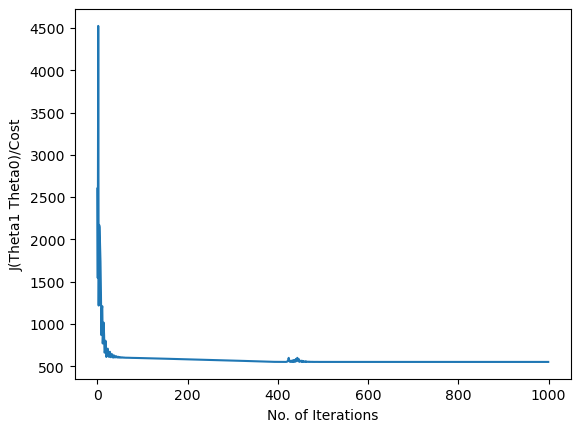

In [27]:
plt.plot(history.history['loss'])
plt.xlabel("No. of Iterations")
plt.ylabel("J(Theta1 Theta0)/Cost")
plt.show()


In [29]:
predict = np.array([[8,1]])
print(model.predict(predict))

1/1 [==============================] - 0s 27ms/step
[[32.250797]]
